The Gravity Model
===========

A linear regression example for Econometric Theory
------------------------------------------------------------



The gravity model relates international trade flows
    between country $\ell$ and country $n$ via the 
    equation 
    
$$
    T_{\ell n} = 
    \frac{\lambda \xi_{\ell n} G_\ell^{\alpha} G_n^\beta}
    {D_{\ell n}^{\gamma}}
$$

Here $T_{\ell n}$ is exports from country $\ell$ to country $n$, $\lambda$ is a constant term, $\xi_{\ell n}$ is a
    shock, $G_\ell$ and $G_n$ are GDP in country $\ell$  and $n$ respectively,
    and $D_{\ell n}$ is distance between them.  Taking logs gives the
    linear model

$$
    \ln T_{\ell n} 
        = \ln \lambda 
        +  \alpha \ln G_\ell + \beta \ln G_n - \gamma \ln D_{\ell n}
        + \ln \xi_{\ell n}
$$

Here our aim is to give a simple example of linear regression based around this example, using Python's [statsmodels](http://statsmodels.sourceforge.net/) and [pandas](http://pandas.pydata.org/).


Many thanks to [Matthew McKay](https://github.com/mmcky) for organizing all the data and putting together the first version of this demo.

Data
-----
Trade data is sourced from: http://atlas.media.mit.edu/en/resources/data and uses the SITC rev 2. product level trade dataset. This product level data is aggregated to form a bilateral trade dataset at the country level.

Distance and Geography is sourced from CEPII: http://www.cepii.fr/CEPII/en/bdd_modele/presentation.asp?id=6

GDP and Population statistics are from the World Development Indicators: http://data.worldbank.org/data-catalog/world-development-indicators

In [18]:
%matplotlib inline

In [19]:
import pandas as pd
import numpy as np
from numpy import log
import statsmodels.formula.api as smf

Import the data from a ``csv`` data file for the year 2013

In [20]:
data = pd.read_csv("./data/gravity_dataset_2013.csv")

Let's have a look at the first few rows.

In [21]:
data.head()

,year,iiso3c,eiso3c,value,contig,comlang_off,colony,dist,distcap,distw,distwces,ell,ill,egdp,egdppc,epop,igdp,igdppc,ipop
0,2013,ABW,BEL,774353,0,1,0,7847.070,7847.070,7843.255,7843.006,0,0,4.204710e+11,37599.735498,11182817,NaN,NaN,102921
1,2013,ABW,BHS,4712537,0,0,0,1588.515,1588.515,1634.515,1628.143,0,0,7.835118e+09,20736.547344,377841,NaN,NaN,102921
2,2013,ABW,CHE,17812626,0,0,0,8056.332,8056.332,8074.21,8073.511,1,0,4.772463e+11,58996.896141,8089346,NaN,NaN,102921
3,2013,ABW,CHN,25319168,0,0,0,14155.350,14155.350,14590.92,14560.28,0,0,4.912954e+12,3619.439108,1357380000,NaN,NaN,102921
4,2013,ABW,COL,22160086,0,1,0,1036.634,1036.634,929.5887,861.2452,0,0,2.129079e+11,4497.196936,47342363,NaN,NaN,102921


Description of the data

In [22]:
data.describe()

,year,value,contig,comlang_off,colony,dist,distcap,ell,ill,egdp,egdppc,epop,igdp,igdppc,ipop
count,22695,2.141300e+04,22695.000000,22695.000000,22695.000000,22695.000000,22695.000000,22695.000000,22695.000000,2.140300e+04,21403.000000,2.269500e+04,2.204600e+04,22046.000000,2.269500e+04
mean,2013,7.365519e+08,0.018771,0.149460,0.015113,7626.396993,7607.736961,0.175017,0.174400,3.681618e+11,11998.090079,4.265514e+07,4.707726e+11,14159.274814,5.194448e+07
std,0,6.699105e+09,0.135717,0.356549,0.122007,4480.491813,4479.504746,0.379990,0.379461,1.357443e+12,16470.908447,1.522340e+08,1.533534e+12,17685.615815,1.740458e+08
min,2013,1.000000e+00,0.000000,0.000000,0.000000,8.300385,8.300385,0.000000,0.000000,2.620733e+07,150.744900,9.876000e+03,1.203875e+08,150.744900,2.091900e+04
25%,2013,7.911600e+04,0.000000,0.000000,0.000000,4063.903500,4034.010000,0.000000,0.000000,7.835118e+09,1122.482815,2.346592e+06,1.134676e+10,1776.746022,3.593689e+06
50%,2013,2.675794e+06,0.000000,0.000000,0.000000,7216.537000,7205.898000,0.000000,0.000000,2.990891e+10,4480.126282,9.039978e+06,4.530376e+10,5896.096631,1.032223e+07
75%,2013,5.730555e+07,0.000000,0.000000,0.000000,10629.535000,10587.270000,0.000000,0.000000,1.961804e+11,15371.305767,3.020105e+07,2.303713e+11,20736.547344,3.657339e+07
max,2013,4.220679e+11,1.000000,1.000000,1.000000,19812.040000,19812.040000,1.000000,1.000000,1.445151e+13,79511.205382,1.357380e+09,1.445151e+13,79511.205382,1.357380e+09


The names of all the variables are as follows:

In [23]:
data.columns

Index(['year', 'iiso3c', 'eiso3c', 'value', 'contig', 'comlang_off', 'colony',
       'dist', 'distcap', 'distw', 'distwces', 'ell', 'ill', 'egdp', 'egdppc',
       'epop', 'igdp', 'igdppc', 'ipop'],
      dtype='object')

Here `egdp` is export country GDP, `igdp` is import country GDP and `dist` is distance.  These are our regressors.  The dependent variable is `value`.

### Estimation 

Estimate the basic gravity model

In [24]:
formula = "log(value) ~ log(egdp) + log(igdp) + log(dist)"
model = smf.ols(formula, data)
result = model.fit(cov_type='HC1')
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             log(value)   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                 1.203e+04
Date:                Wed, 04 Nov 2015   Prob (F-statistic):               0.00
Time:                        16:02:42   Log-Likelihood:                -47185.
No. Observations:               19655   AIC:                         9.438e+04
Df Residuals:                   19651   BIC:                         9.441e+04
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -30.2350      0.394    -76.773      0.0

The next cell writes this table to a file in LaTeX format.

In [25]:
summ = result.summary()
with open("./result_summary.tex", 'w') as f:
    f.write(summ.as_latex())

### Replication Using Linear Algebra

Let's try to replicate the values of the estimated coefficients $\hat \beta_k$ using matrix algebra.  The first step is to extract the variables we care about and drop all rows with missing values.

In [26]:
data2 = data[['value', 'egdp', 'igdp', 'dist']]
data2 = data2.dropna()

Now let's compute the coefficients directly.

In [27]:
from numpy.linalg import inv

y = np.asarray(np.log(data2.value))
X = np.ones((len(y), 4))
X[:, 1] = log(data2.egdp)
X[:, 2] = log(data2.igdp)
X[:, 3] = log(data2.dist)

betahat = inv(X.T @ X) @ X.T @ y
print(betahat)

[-30.23498073   1.27825004   1.02865139  -1.34830012]


Sure enough, the values match with those given in the table above.

The $R^2$ reported in the table above is the centered $R^2$.  We can replicate it using the formula from the text.

In [28]:
Py = np.dot(X, betahat)
ybar = np.mean(y)
Rsq = np.sum((Py - ybar)**2) / np.sum((y - ybar)**2)

In [29]:
Rsq

0.65199375649256841

### Additional Regressors

Estimate the model with some additional explanatory variables

In [30]:
model2 = smf.ols("log(value) ~ log(egdp) + log(igdp) + log(dist)+\
                  contig + comlang_off + colony + ell + ill", data)
result2 = model2.fit()
result2 = result2.get_robustcov_results()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:             log(value)   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     4991.
Date:                Wed, 04 Nov 2015   Prob (F-statistic):               0.00
Time:                        16:02:43   Log-Likelihood:                -46736.
No. Observations:               19655   AIC:                         9.349e+04
Df Residuals:                   19646   BIC:                         9.356e+04
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     -30.5841      0.397    -77.092      

Estimating the model with GDPPC instead of GDP

Plot
----

A plot of components of the basic model

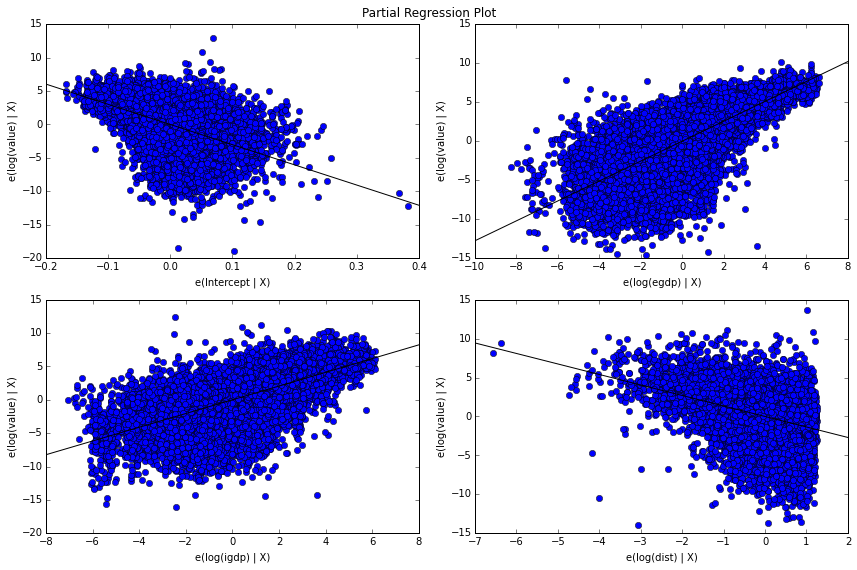

In [31]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(result, fig=fig)

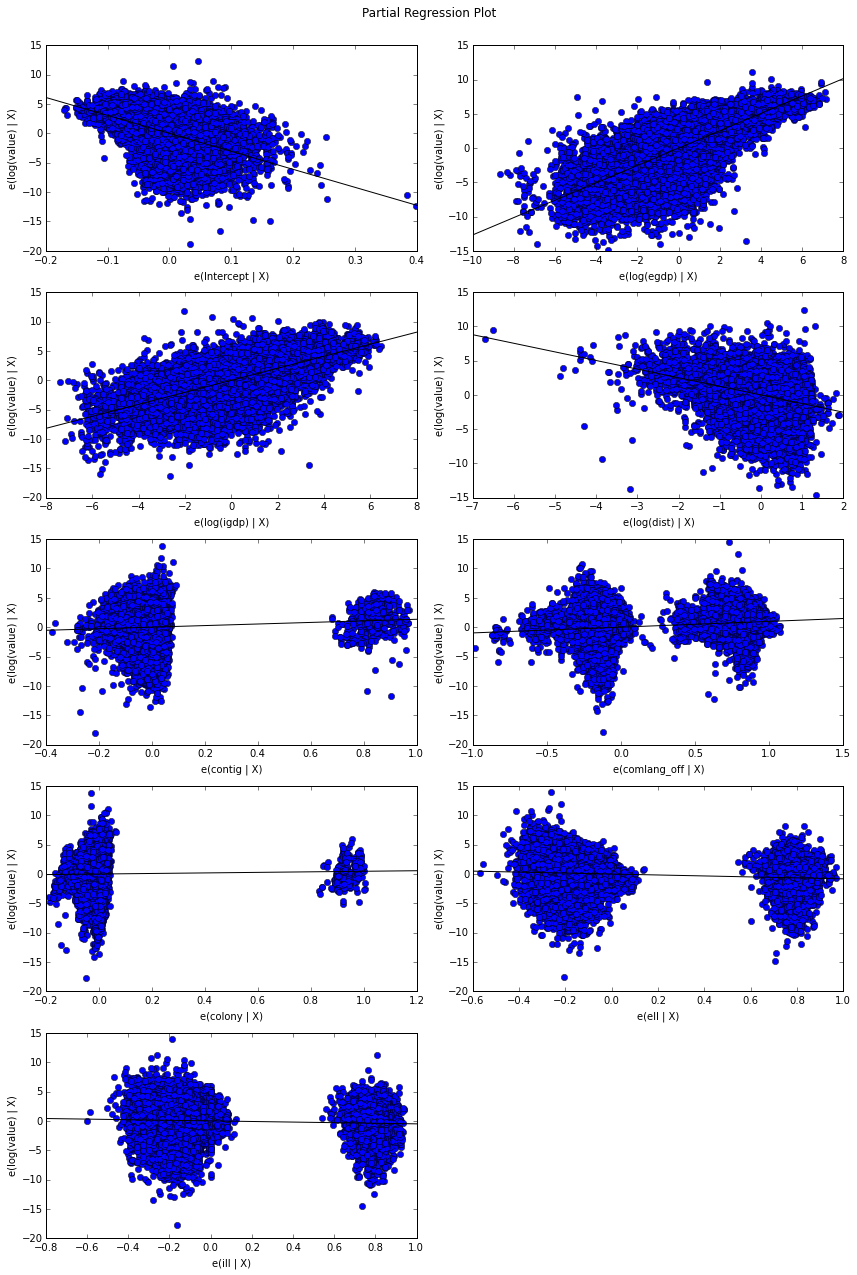

In [32]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = plt.figure(figsize=(12,18))
fig = sm.graphics.plot_partregress_grid(result2, fig=fig)

Additional Specifications
-----------------------------

- model1b includes population size of exporter and importer
- model3 uses gdppc in place of gdp

In [33]:
model1b = smf.ols("log(value) ~ log(egdp) + log(epop) + log(igdp) + log(ipop) + log(dist)", data)
result1b = model1b.fit()
result1b = result1b.get_robustcov_results()
print(result1b.summary())

                            OLS Regression Results                            
Dep. Variable:             log(value)   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     7497.
Date:                Wed, 04 Nov 2015   Prob (F-statistic):               0.00
Time:                        16:02:46   Log-Likelihood:                -47123.
No. Observations:               19655   AIC:                         9.426e+04
Df Residuals:                   19649   BIC:                         9.431e+04
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -30.2956      0.393    -77.090      0.0

In [34]:
#-Model with additional Explanatory Variables-#
model3 = smf.ols("log(value) ~ log(egdppc) + log(igdppc) + log(dist)+\
                  contig + comlang_off + colony + ell + ill", data)
result3 = model3.fit()
result3 = result3.get_robustcov_results()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:             log(value)   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     1069.
Date:                Wed, 04 Nov 2015   Prob (F-statistic):               0.00
Time:                        16:02:46   Log-Likelihood:                -54734.
No. Observations:               19655   AIC:                         1.095e+05
Df Residuals:                   19646   BIC:                         1.096e+05
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      12.5575      0.417     30.094      